# Data Analyst NanoDegree Project III

## Data Visualiztion - Ford GoBike System Data



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#explanatory">Explanatory Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I will be analyzing in this dataset is from Ford GoBike System. It contains information on a bike sharing system in the San Francisco Bay area.

The main questions i'm exploring in this dataset are:

- When are most trips taken in terms of time of day, day of the week?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?


I will get a better understanding of the data through univariate, bivariate and multivariate.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.api.types import CategoricalDtype

sns.set(rc={'figure.figsize':(9,6)})

<a id='wrangling'></a>
## Preliminary Wrangling

### Assessing Data

In [2]:
# Read dataset

bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# View dataframe info

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Get descriptive statistics of the data

bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# Identify shape of dataset

bike_data.shape

(183412, 16)

In [6]:
# Check to confirm that missing data member_gender and member_birth_year are from 
print(bike_data.user_type.value_counts())
bike_data_cust = bike_data[bike_data['user_type']== 'Customer']
bike_data_cust.head()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
12,1176,2019-02-28 23:45:12.6510,2019-03-01 00:04:49.1840,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990.0,Male,No
19,874,2019-02-28 23:43:05.1830,2019-02-28 23:57:39.7960,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,No


In [7]:
bike_data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<AxesSubplot:>

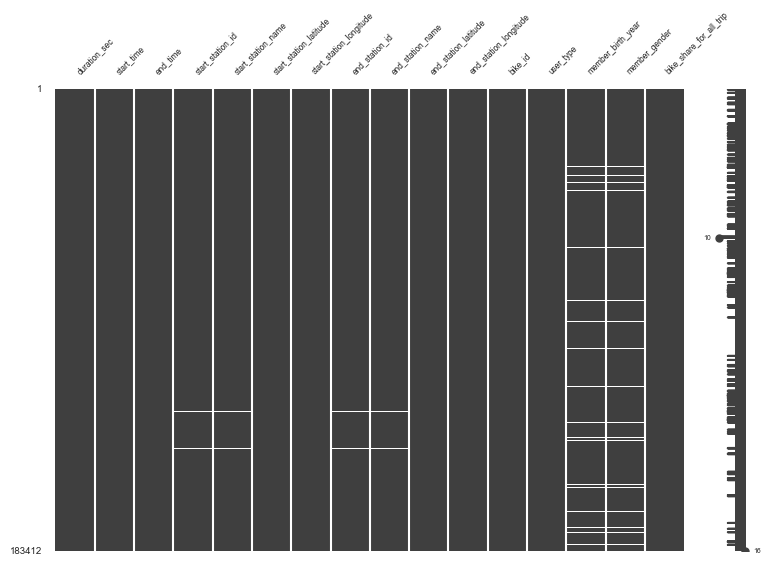

In [8]:
msno.matrix(bike_data, figsize=(9,6), fontsize=6)

In [9]:
print(bike_data.start_time.max())
print(bike_data.start_time.min())

2019-02-28 23:59:18.5480
2019-02-01 00:00:20.6360


In [10]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Findings

1. We have 8265 missing data in the member_birth_year and member_gender columns and 197 missing values in the start_station_id, start_station_name, end_station_id and end_station_name. The missing data is < 5% of the 183412 records thus statistically insignificant and will be dropped.
2. We have incorrect data typeson 8 columns:start_station_id, end_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip, start_time, end_time
3. Start time column can provide the folowing derived columns: hour, day of week, month and year. Hour and dow will need to be changed into ordered categorical datatypes after being derived.
4. User Age can be derived from member_birth_year
5. Trip duration in minutes to be derived from duration_sec column
6. Unwanted columns to be dropped: duration_sec, member_birth_year, start_time, end_time, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude

<a id='assessing'></a>
### Cleaning

1. 8265 missing data in the member_birth_year and member_gender columns and 197 missing values in the start_station_id, start_station_name, end_station_id and end_station_name. The missing data is < 5% of the 183412 records thus statistically insignificant and will be dropped.

In [11]:
# Drop Missing values
bike_data = bike_data.dropna()

In [12]:
# Test
bike_data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

2. Incorrect data typeson 8 columns: start_station_id, end_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip, start_time, end_time. These will be corrected with the astype and to_datetime functions.

In [13]:
# Modify data type
bike_data.start_station_id = bike_data.start_station_id.astype(str)
bike_data.end_station_id = bike_data.end_station_id.astype(str)
bike_data.bike_id = bike_data.bike_id.astype(str)
bike_data.user_type = bike_data.user_type.astype('category')
bike_data.member_gender = bike_data.member_gender.astype('category')
bike_data.bike_share_for_all_trip = bike_data.bike_share_for_all_trip.astype('category')
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [14]:
# Test
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

3. Start time column can provide the folowing derived columns: hour, day of week. These will need to be changed into ordered categorical datatypes after being derived.

In [15]:
# Derive hour column and convert to an ordered category
bike_data['hour'] = bike_data.start_time.dt.hour.astype(str)
hours  = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13',
          '14','15','16','17','18','19','20','21','22','23']
hour_cat = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
bike_data.hour = bike_data.hour.astype(hour_cat)

In [16]:
# Derive day of week column and convert to an ordered category
bike_data['day'] = bike_data.start_time.dt.strftime('%a')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_cat = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_data.day = bike_data.day.astype(day_cat)

In [17]:
# Create column identifying if date is weekday or weekend
bike_data['weekday_weekend'] = ''
bike_data.loc[(bike_data['day'] == 'Sat') | (bike_data['day'] == 'Sun'), 'weekday_weekend'] = 'Weekend'  
bike_data.loc[(bike_data['day'] != 'Sat') & (bike_data['day'] != 'Sun'), 'weekday_weekend'] = 'Weekday'  

In [18]:
bike_data.weekday_weekend.value_counts()

Weekday    146026
Weekend     28926
Name: weekday_weekend, dtype: int64

In [19]:
# Test
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

4. User Age can be derived from member_birth_year by finding the difference between the year the data was collected(2019) and member_birth_year and stored as an integer

In [20]:
# Calculate customer age
bike_data['member_age'] = 2019 - bike_data['member_birth_year'].astype(int)

In [21]:
# Test
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day,weekday_weekend,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thu,Weekday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thu,Weekday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thu,Weekday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thu,Weekday,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,Thu,Weekday,60


5. Trip duration in minutes to be derived from duration_sec column by division by 60

In [22]:
# create column with trip duration in minutes
bike_data['duration_min'] = bike_data['duration_sec']/60

In [23]:
# Test
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day,weekday_weekend,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,17,Thu,Weekday,35,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12,Thu,Weekday,47,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,17,Thu,Weekday,30,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23,Thu,Weekday,45,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,23,Thu,Weekday,60,29.883333


6. Unwanted columns to be dropped: duration_sec, member_birth_year, start_time, end_time, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude using drop function

In [24]:
# Drop unwanted columns
bike_data.drop(['duration_sec', 'member_birth_year', 'start_time', 'end_time', 'start_station_latitude', 
         'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [25]:
# Test
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174952 non-null  object  
 1   start_station_name       174952 non-null  object  
 2   end_station_id           174952 non-null  object  
 3   end_station_name         174952 non-null  object  
 4   bike_id                  174952 non-null  object  
 5   user_type                174952 non-null  category
 6   member_gender            174952 non-null  category
 7   bike_share_for_all_trip  174952 non-null  category
 8   hour                     174952 non-null  category
 9   day                      174952 non-null  category
 10  weekday_weekend          174952 non-null  object  
 11  member_age               174952 non-null  int64   
 12  duration_min             174952 non-null  float64 
dtypes: category(5), float64(1), int64(1), object

### What is the structure of your dataset?

> My dataset has 12 columns and 174952 rows. It has 6 object variables, 5 categorical variables, 2 of which are ordinal, 1 integer variable and 1 float variable.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are trip duration, time of day and day of week trps were taken, and user data, that is, user type, gender and age. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support my investigation are:
- duration_min
- member_age
- weekday_weekend
- day
- hour
- user_type

<a id='univariate'></a>
## Univariate Exploration

### Questions

- Is this service used more by subscribers than customers?
- Which gender took more trips?
- What hours of the day register more trips?
- What day of the week has more trips?
- What is the distribution of user age?
- What is the distribution of trip duration?

In [26]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [27]:
# Define base color
base_color = sns.color_palette()[4]

In [28]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174952 non-null  object  
 1   start_station_name       174952 non-null  object  
 2   end_station_id           174952 non-null  object  
 3   end_station_name         174952 non-null  object  
 4   bike_id                  174952 non-null  object  
 5   user_type                174952 non-null  category
 6   member_gender            174952 non-null  category
 7   bike_share_for_all_trip  174952 non-null  category
 8   hour                     174952 non-null  category
 9   day                      174952 non-null  category
 10  weekday_weekend          174952 non-null  object  
 11  member_age               174952 non-null  int64   
 12  duration_min             174952 non-null  float64 
dtypes: category(5), float64(1), int64(1), object

##### Question
1. Is this service used more by subscribers than customers?

##### Plot

In [29]:
# Define function to plot countplot for categorical variables with percentage distribution in dataset in the bar
def catvar_count(data, catvar):
    type_order = data[catvar].value_counts().index
    ax = sns.countplot(data=data, x=catvar, color=base_color, order=type_order)
    ax.set_title('{} Distribution'.format(catvar.title()))
    plt.ylabel('No. of Trips')
    v_count = data[catvar].value_counts()
    total = v_count.sum()
    loc, labels = plt.xticks(size=10)
    for loc, label in zip(loc, labels):
        count = v_count[label.get_text()]
        pct_string = '{:0.2f}%'.format(100*count/total)
        plt.text(loc, count-10000, pct_string, ha='center', weight='bold', color='w', fontsize=10)

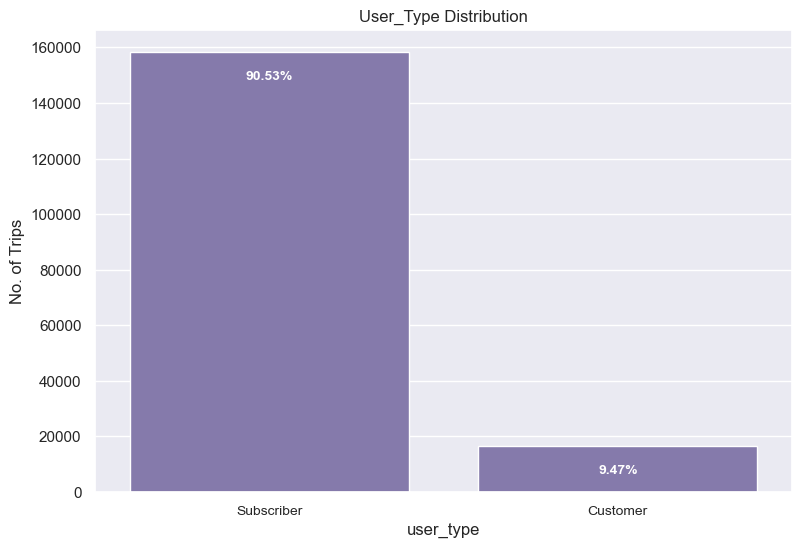

In [30]:
catvar_count(bike_data, 'user_type')

###### Observation

90.53% of users in the San Francisco Bay Area are subscribers while 9.47% are casual customers

##### Question
2. Which gender took more trips?

##### Plot

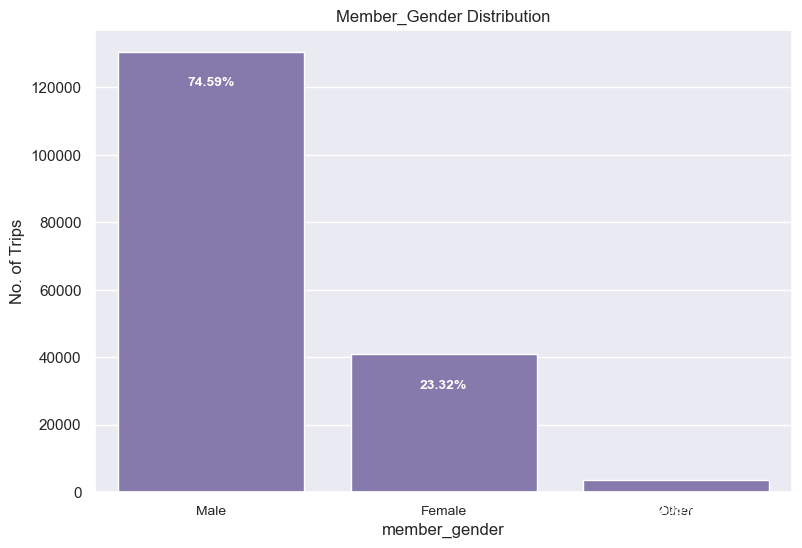

In [31]:
# Plot gender distribution
catvar_count(bike_data, 'member_gender')

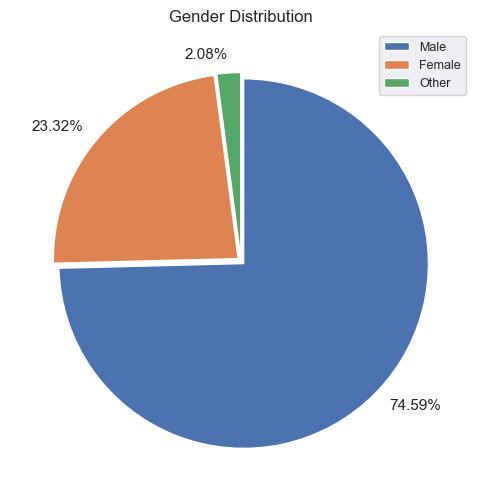

In [32]:
df = np.round(bike_data['member_gender'].value_counts(normalize = True) * 100, 2)

# Plotting the graph
plt.title('Gender Distribution')
plt.pie(df, labels=[f"{str(gender)}%" for gender in df.values],startangle=90, explode=np.repeat(0.02, len(df.index)),
        counterclock=False, );
plt.legend(df.index, fontsize=9);

###### Observation

There are more males than females who made trips. We have 74.59% males, 23.32% females and 2.08 'other' gender.

##### Question
3. Did users of the Ford GoBike system use the bike share option often?

#####  Plot

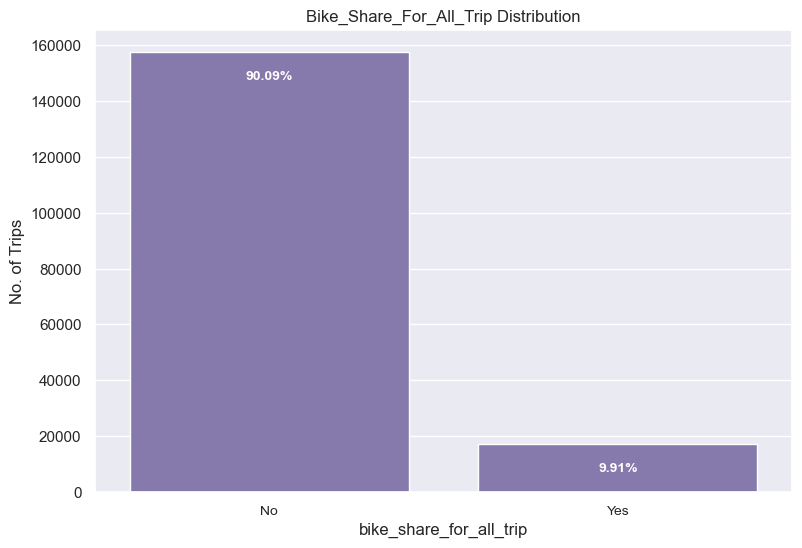

In [33]:
# Plot bike sharing distribution

catvar_count(bike_data, 'bike_share_for_all_trip')

###### Observation
Most users did not use the bike share option for their trips.

##### Question

4. What hours of the day have the most trips?

In [34]:
##### Plot

<AxesSubplot:xlabel='hour', ylabel='count'>

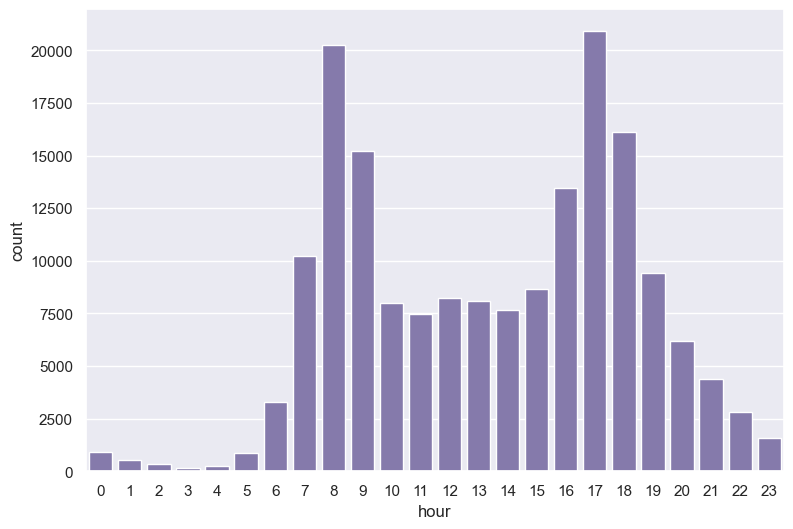

In [35]:
# Plot hour distribution
sns.countplot(data = bike_data, x = 'hour', color = base_color)


In [36]:
# Define function to plot countplot for ordinal categorical variables with percentage distribution in dataset in the bar
def ord_catvar_count(data, catvar):
    ax = sns.countplot(data=data, x=catvar, color=base_color)
    ax.set_title('{} Distribution'.format(catvar.title()))
    plt.ylabel('No. of Trips')
    v_count = data[catvar].value_counts()
    total = v_count.sum()
    loc, labels = plt.xticks(size=10)
    for loc, label in zip(loc, labels):
        count = v_count[label.get_text()]
        pct_string = '{:0.2f}%'.format(100*count/total)
        plt.text(loc, count-10000, pct_string, ha='center', weight='bold', color='w', fontsize=6)

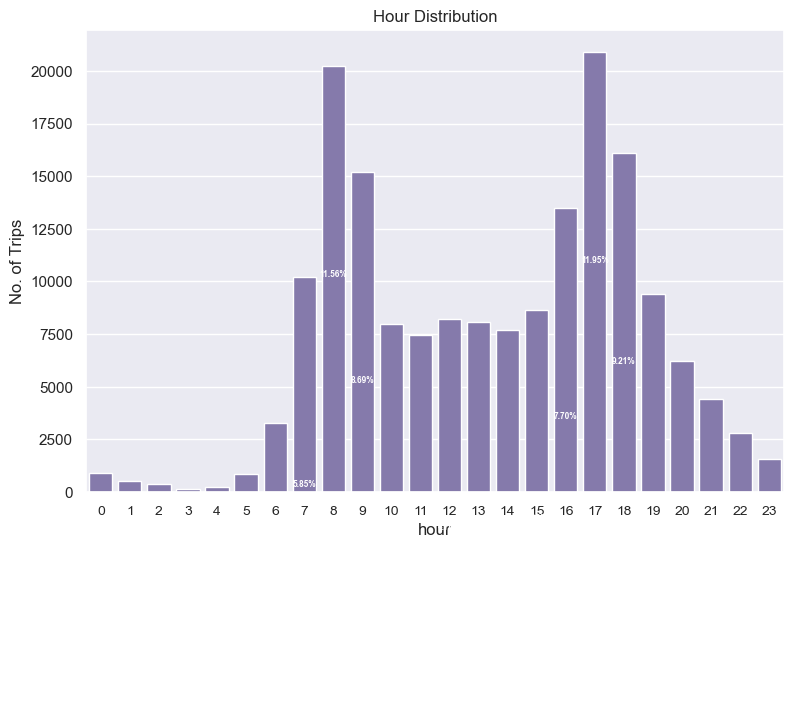

In [37]:
ord_catvar_count(bike_data, 'hour')

###### Observation
Majority of the tips are seen to be taken between the 0700Hrs and 0959Hrs, and in the evening, between 1600Hrs to 1859Hrs. Most trips are taken immediately before and after working/school hours. The trips taken during working hours are seen to be around a constant value(7500) and those after 1859Hrs gradually decrease.

##### Question

5. What days of the week have the most trips?

##### Plot

<AxesSubplot:xlabel='day', ylabel='count'>

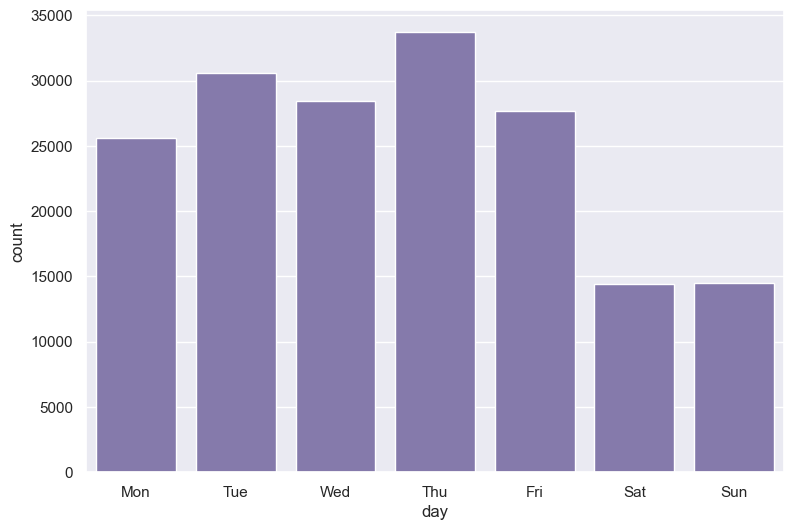

In [38]:
# Plot day of week distribution
sns.countplot(data = bike_data, x = 'day', color = base_color)


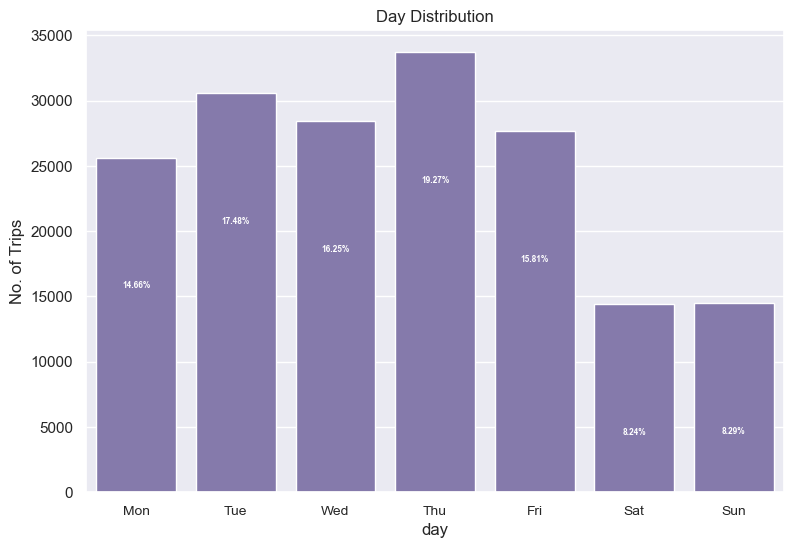

In [39]:
ord_catvar_count(bike_data, 'day')

###### Observation
Most trips were made on Thursday and Tuesday, with weekdays having more trips than weekends. Seeing as a lot of trips were made during commute hours to and from work, this distribution on day of week adds up.

##### Question

5. What is the age distribution of our users in the month of February 2019?

##### Plot

In [40]:
# Get statistical detail on the user age column
bike_data.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [41]:
# Remove age outlier
bike_data = bike_data[bike_data['member_age'] < 120]

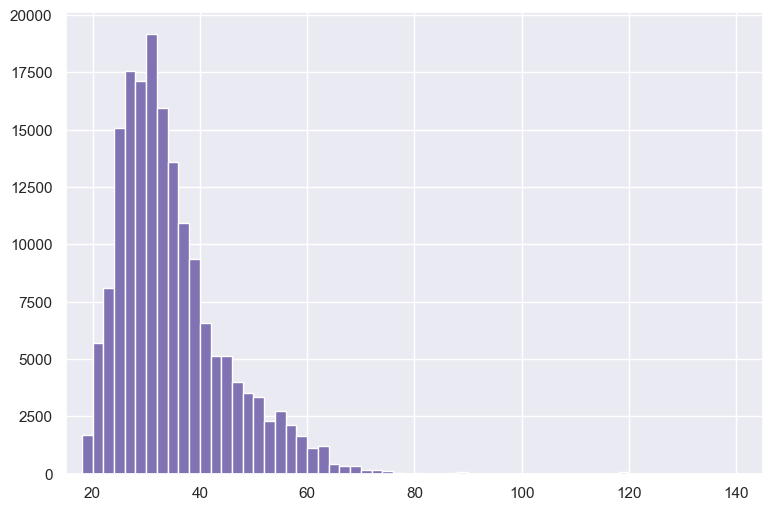

In [42]:
# Plot a histogram to view distribution of age

bins = np.arange(0, bike_data.member_age.max()+2, 2)
plt.figure( figsize=(9,6))
plt.hist(bike_data.member_age, bins = bins, color = '#8172b3')
plt.xlim([15,145]);

###### Observation
Age distribution with is skewed to the right. Majority of the users approximately fall between 24 to 40 yrs old.

##### Question

7. From the dataset, how long did the trips last?

##### Plot

In [43]:
# Get statistical detail on the duration column
bike_data.duration_min.describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

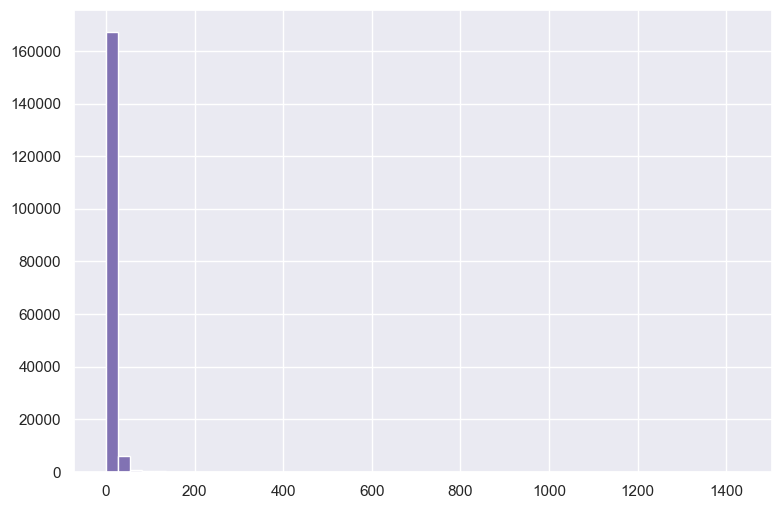

In [44]:
# Plot a histogram to view distribution of trip duration

bins = np.arange(0, bike_data.duration_min.max()+27, 27)
plt.figure( figsize=(9,6))
plt.hist(bike_data.duration_min, bins = bins, color = '#8172b3');

The distribution is significantly skewed to the right, so I'll explore a log transform on the duration_min

In [45]:
log_duration = np.log10(bike_data.duration_min)

log_duration.describe()

count    174951.000000
mean          0.929670
std           0.305189
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

Text(0.5, 0, 'Duration in Minutes')

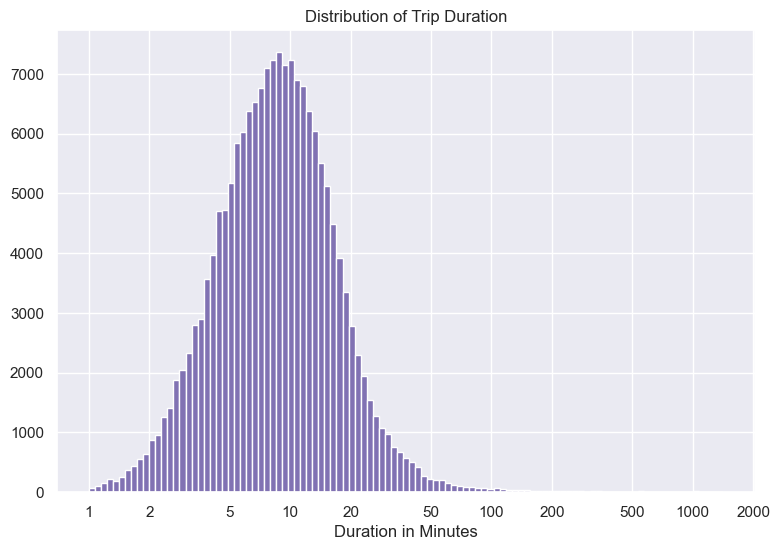

In [46]:
# Plot a histogram to view distribution of trip duration
bins = 10**(np.arange(0, np.log10(bike_data.duration_min.max())+0.03, 0.03))
plt.figure( figsize=(9,6))
plt.hist(bike_data.duration_min, bins = bins, color = '#8172b3')
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100,200,500,1000,2000]
            , [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration in Minutes')

In [47]:
len(bike_data[bike_data['duration_min'] <= 35]) / len(bike_data['duration_min']) * 100

97.61247434996085

###### Observation
This distribution with a log transform better shows the distribution of trip duration. It is skewed to the right as well, with majority of the trips seen between 5 - 18 minutes. Most users ride these bicycles for a short duration, with 97.6% of the rides being 35 minutes or less. A normal distribution is observed between 0 and approximately 75 mins

### Conclusions from Univariate Exploration

- We have more subscribers than customers.
- There are more males than females who made trips in the sample dataset.
- Most users did not use the bike share option for their trips.
- Majority of the tips are seen to be taken between the 0700Hrs and 0959Hrs, and in the evening, between 1600Hrs to 1859Hrs. Most trips are taken immediately before and after working/school hours. The trips taken during working hours are seen to be around a constant value(7500) and those after 1859Hrs gradually decrease.
- Most trips were made on Thursday and Tuesday, with weekdays having more trips than weekends. Seeing as a lot of trips were made during commute hours to and from work, this distribution on day of week adds up.
- User age distribution with is skewed to the right. Majority of the users approximately fall between 24 to 40 years old.
- Trip duration distribution is skewed to the right as well, with majority of the trips seen between 5 - 18 minutes. Most users ride these bicycles for a short duration.

It would be interesting to see the relationship between these variables. Does the distribution of any of these variable change based on influence from another variable?

<a id='bivariate'></a>
## Bivariate Exploration

Here I will explore the relationships between pairs of variables in the Ford GoBike trip data.

In [48]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174951 non-null  object  
 1   start_station_name       174951 non-null  object  
 2   end_station_id           174951 non-null  object  
 3   end_station_name         174951 non-null  object  
 4   bike_id                  174951 non-null  object  
 5   user_type                174951 non-null  category
 6   member_gender            174951 non-null  category
 7   bike_share_for_all_trip  174951 non-null  category
 8   hour                     174951 non-null  category
 9   day                      174951 non-null  category
 10  weekday_weekend          174951 non-null  object  
 11  member_age               174951 non-null  int64   
 12  duration_min             174951 non-null  float64 
dtypes: category(5), float64(1), int64(1), object

#### Numeric vs Numeric Variables

##### Question
8. Is there an existing linear relationship between a user age and the trip duration?

##### Plot

Text(0, 0.5, 'Trip Duration (min)')

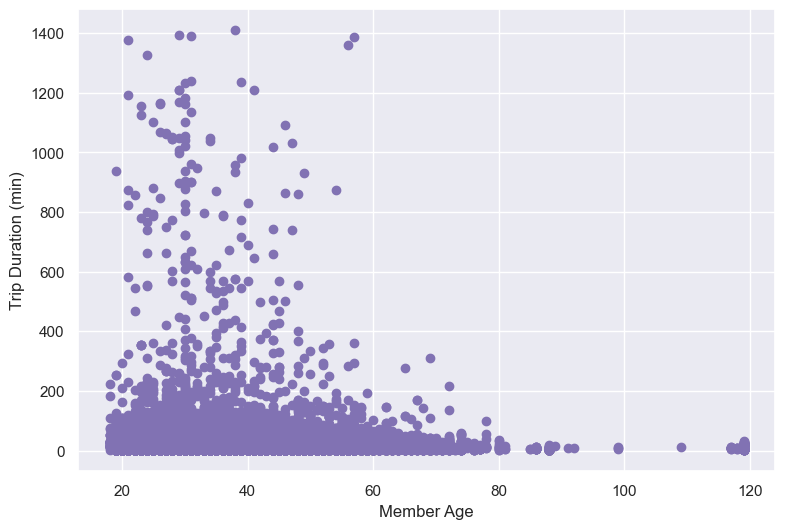

In [49]:
# Explore relationship between numerical variables

plt.scatter(data = bike_data, x = 'member_age', y = 'duration_min', color = '#8172b3');
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (min)')

##### Observation
From the age distribution we had earlier, most users are aged between 24 and 40 years. From this scatterplot, we see that longer trip durations are taken by people who are 60 and below. Members older than 60 years take shorter trips. However, there is no linear relationship between the 2 variables.

Taking a subset of the data to improve visibility and transforming the y axis to a logarithmic scale might shed some more light on this reltionship.

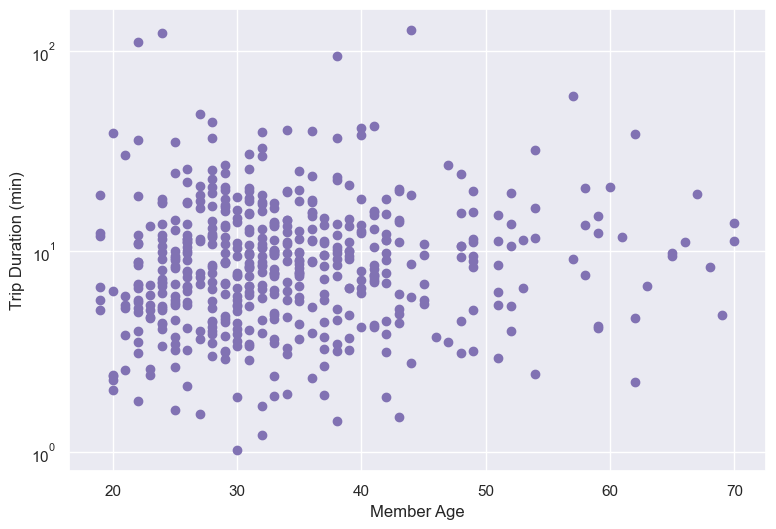

In [50]:
# Explore relationship between numerical variables with log transform on duration
sample_data = bike_data.sample(500)
plt.scatter(data = sample_data, x = 'member_age', y = 'duration_min', color = '#8172b3')
plt.yscale('log')
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (min)');


##### Observation
After sampling the data and taking a log transform of trip duration, there's no linear relationship between user age and trip duration.

#### Numeric vs Categorical Variables

##### Question
9. Do the different user types make most of their trips on different times of the day?

##### Plot

Text(0, 0.5, 'number of trips')

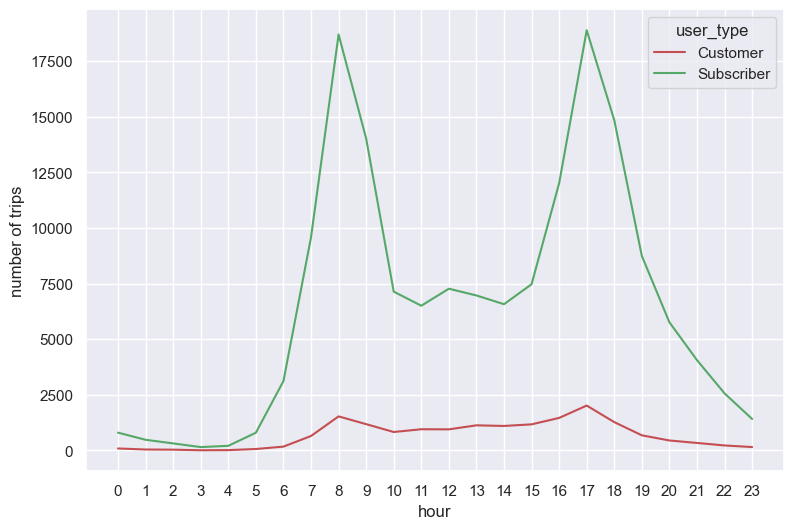

In [51]:
# Plot line chart comparing 
data = bike_data.groupby(['hour', 'user_type'], as_index=False)['bike_id'].count()
sns.lineplot(data = data, x = 'hour', y='bike_id', hue = 'user_type', palette=['r', 'g'])
plt.ylabel('number of trips')

##### Observation
Both user types are seen to mostly use the bike share service when people ideally commute to and from work.

Is the behavior different on weekends compared to weekdays?

##### Question
10. Does the user type behaviour vary on weekends compared to weekdays?

##### Plot

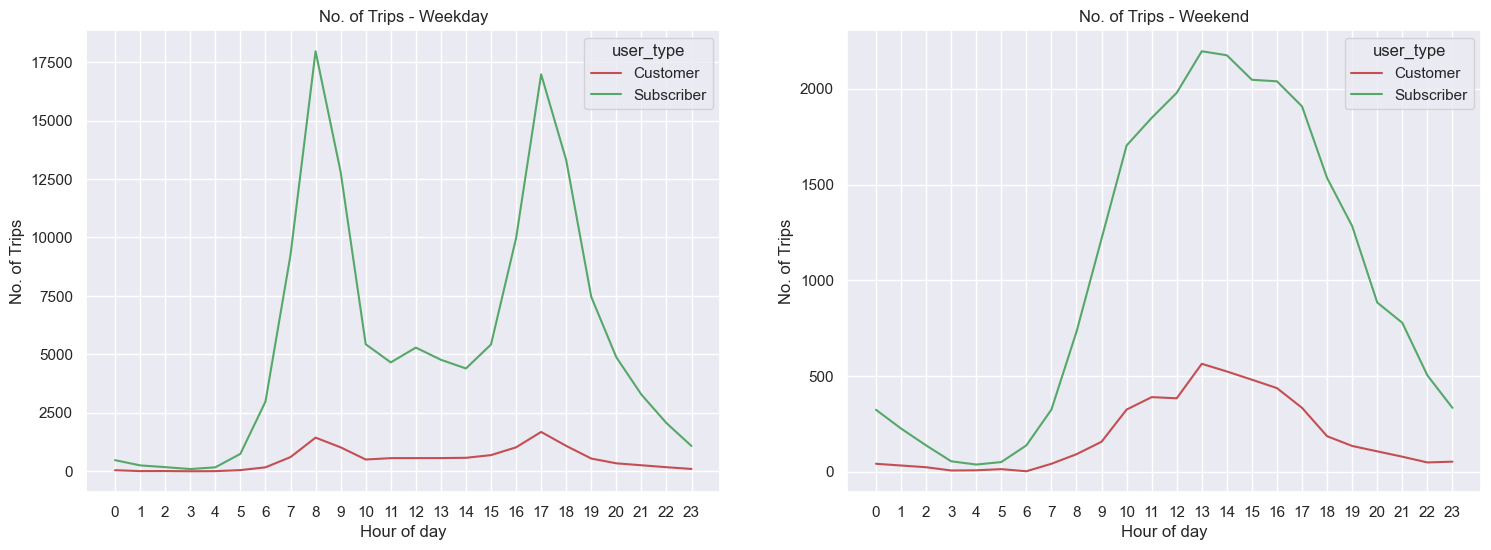

In [52]:
# Comparing trip volumes on hours of the day on weekdays and weekends
data_weekday = bike_data[bike_data['weekday_weekend']=='Weekday']
data_weekend =  bike_data[bike_data['weekday_weekend']=='Weekend']

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
data = data_weekday.groupby(['hour', 'user_type'], as_index=False)['bike_id'].count()
sns.lineplot(data = data, x = 'hour', y='bike_id', hue = 'user_type', palette=['r', 'g'])
plt.title('No. of Trips - Weekday')
plt.xlabel('Hour of day')
plt.ylabel('No. of Trips');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
data = data_weekend.groupby(['hour', 'user_type'], as_index=False)['bike_id'].count()
sns.lineplot(data = data, x = 'hour', y='bike_id', hue = 'user_type', palette=['r', 'g'])
plt.title('No. of Trips - Weekend')
plt.xlabel('Hour of day')
plt.ylabel('No. of Trips');

##### Observation
Both user types display the same behavior on weekdays and weekends. On weekdays, most trips are made around work-home commute hours. On weekends, majority of the trips are taken between 1000Hrs and 1859Hrs. Most trips are taken by subscribers of the service in comparison to casual customers.

In [53]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174951 non-null  object  
 1   start_station_name       174951 non-null  object  
 2   end_station_id           174951 non-null  object  
 3   end_station_name         174951 non-null  object  
 4   bike_id                  174951 non-null  object  
 5   user_type                174951 non-null  category
 6   member_gender            174951 non-null  category
 7   bike_share_for_all_trip  174951 non-null  category
 8   hour                     174951 non-null  category
 9   day                      174951 non-null  category
 10  weekday_weekend          174951 non-null  object  
 11  member_age               174951 non-null  int64   
 12  duration_min             174951 non-null  float64 
dtypes: category(5), float64(1), int64(1), object

#### Question
11. What is the relationship between the categorical variables and member age?

##### Plot

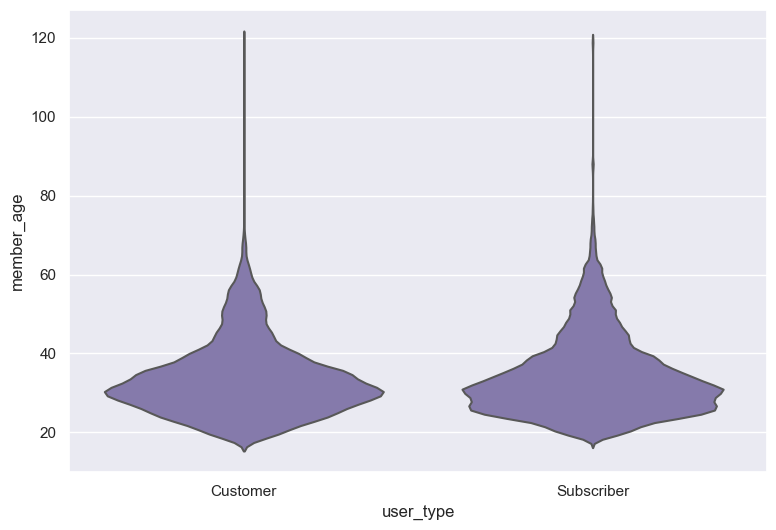

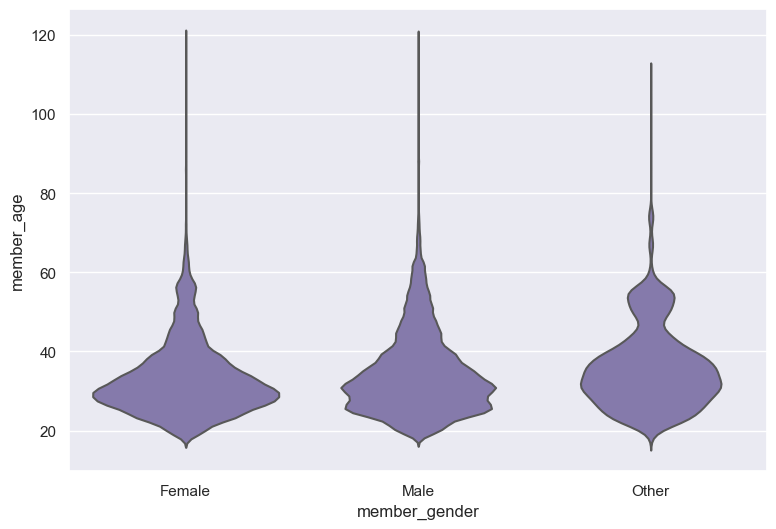

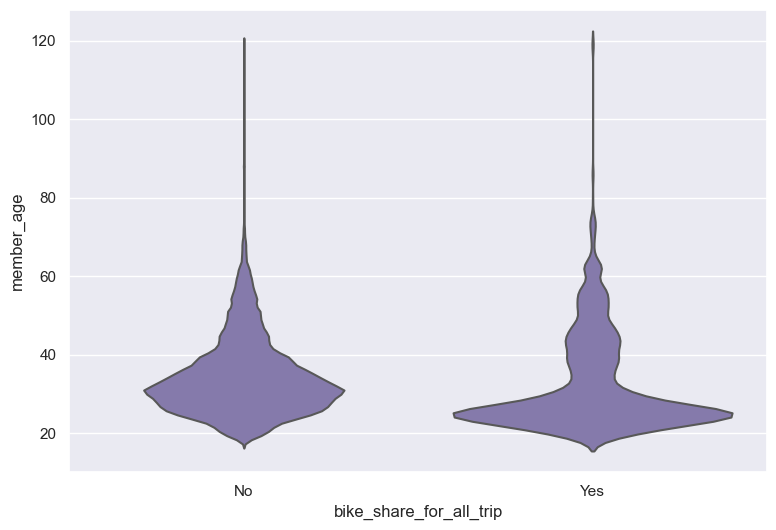

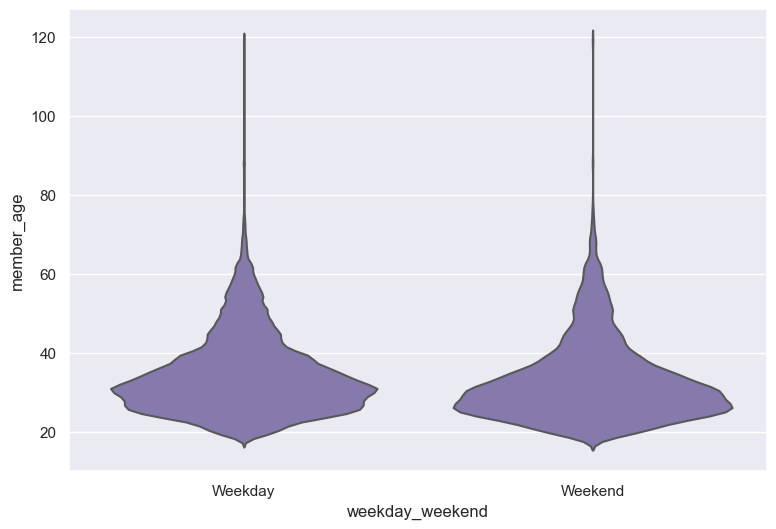

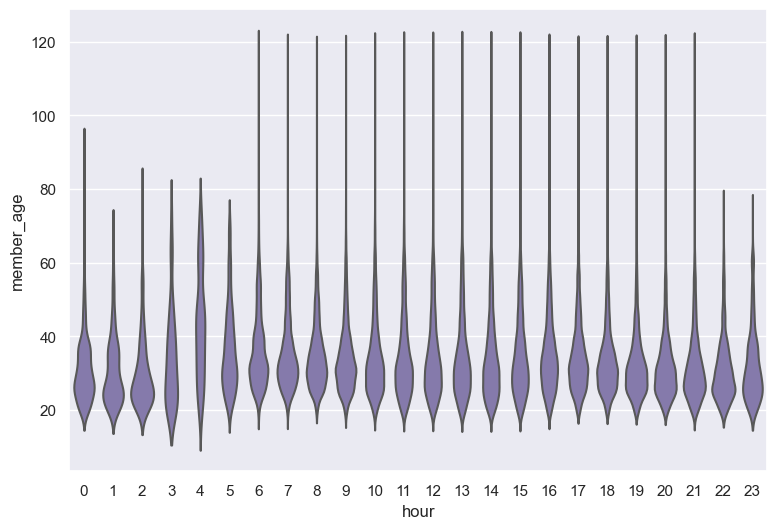

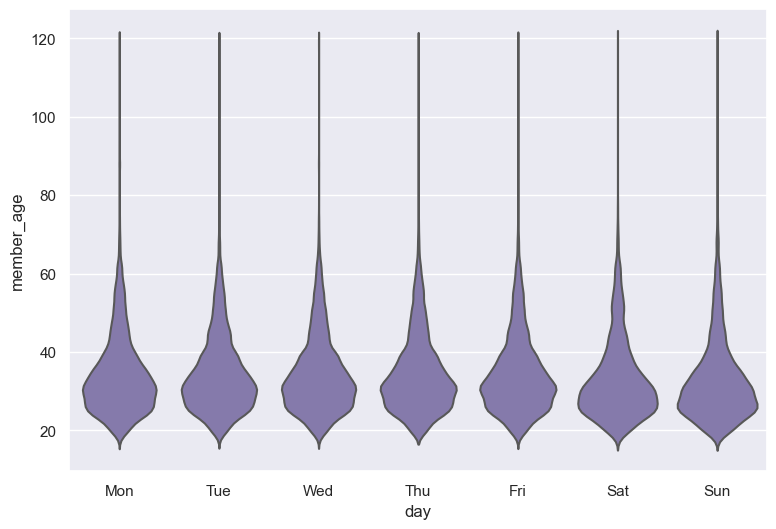

In [54]:
# Define for loop to plot violinplots for specific categorical variables against member age
cat = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'weekday_weekend', 'hour', 'day']
for var in cat:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel = var,ylabel = 'member_age')
    sns.violinplot(bike_data, x=var, y='member_age', color=base_color, inner=None)


##### Observations

On average:
- Majority of customers and subscribers fall around the same age group. 
- While the majority age based on gender is around the same value, the older bike riders appear to be males.
- Majority of users that used the bike share for their entire trip appear to be younger than those that did not use use bike share.
- Majority of users on weekends(especially Sunday) are younger compared to weekdays.

#### Question
12. What is the relationship between the categorical variables and trip duration?

##### Plot

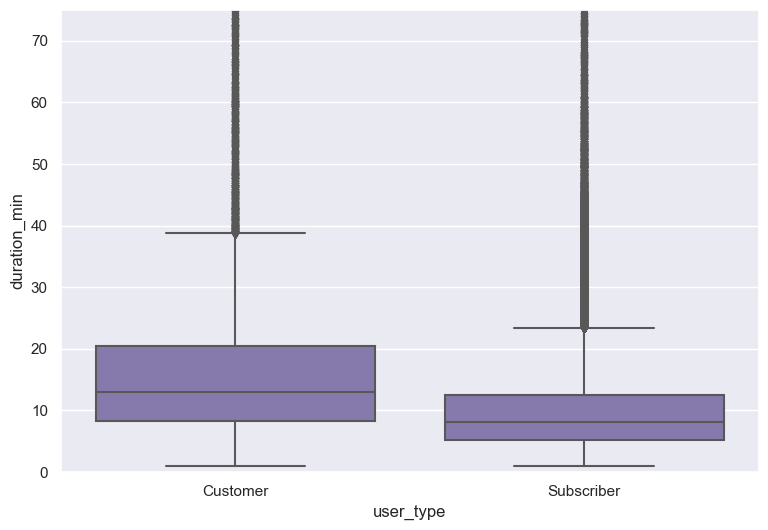

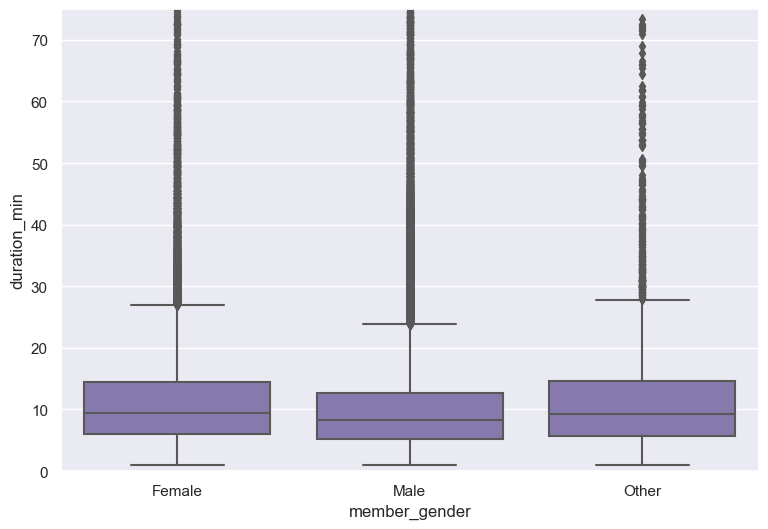

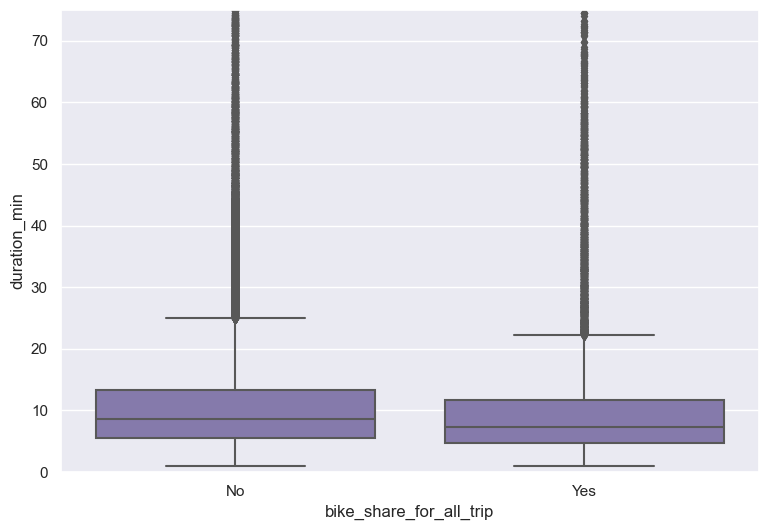

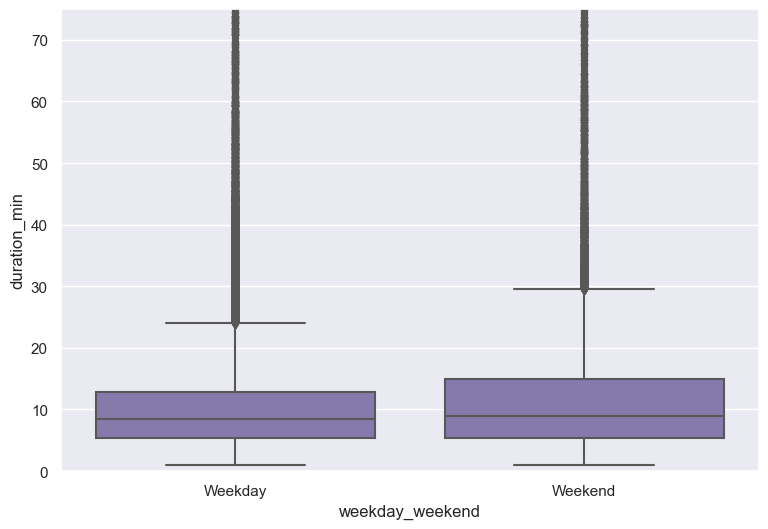

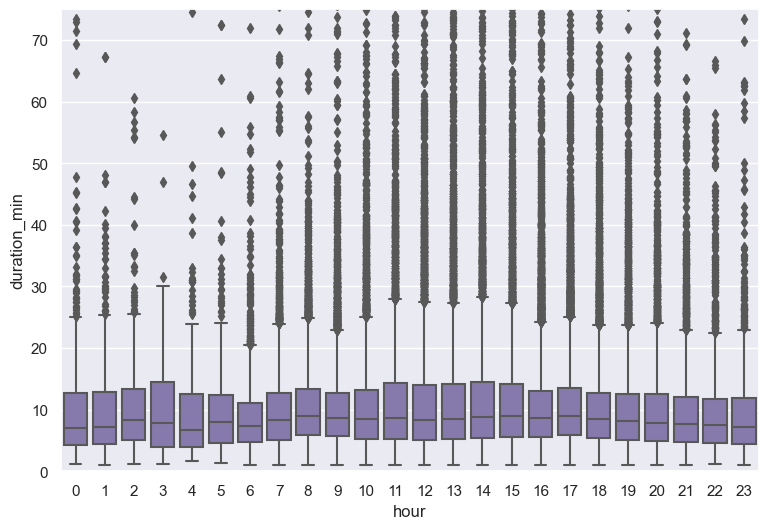

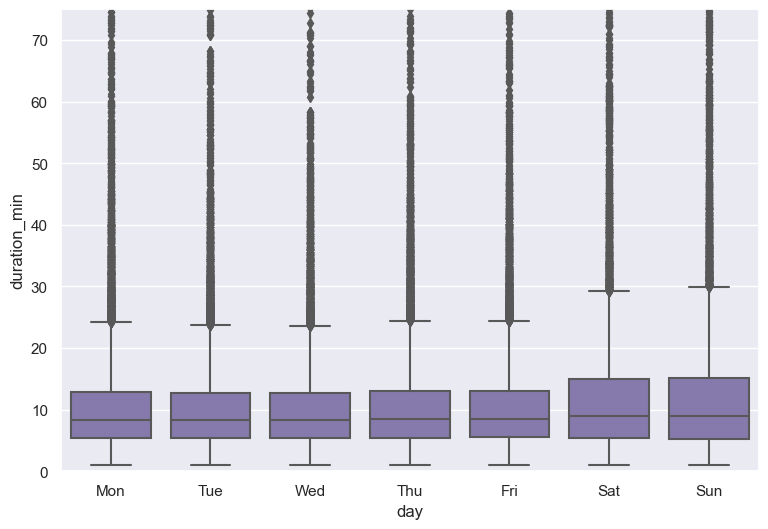

In [55]:
# Define for loop to plot boxplots for specific categorical variables against member age
# Setting ylim to 75 from normal distribution range identified earlier
cat = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'weekday_weekend', 'hour', 'day']
for var in cat:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel = var,ylabel = 'trip duration')
    sns.boxplot(bike_data, x=var, y='duration_min', color=base_color)
    plt.ylim([0,75])

##### Observations

On average:
- Casual risers have longer trips than customers
- Male riders typically have shorter trips than female riders evident by a lower mean in male trips as well as a shorter inter quartile range.
- Bike sharing trips run for a shorter duration than non-bike-share rides.
- Weekend trips are typically longer that weekday trips.

#### Question
13. What is the average trip duration on different days of the week?

#### Plot

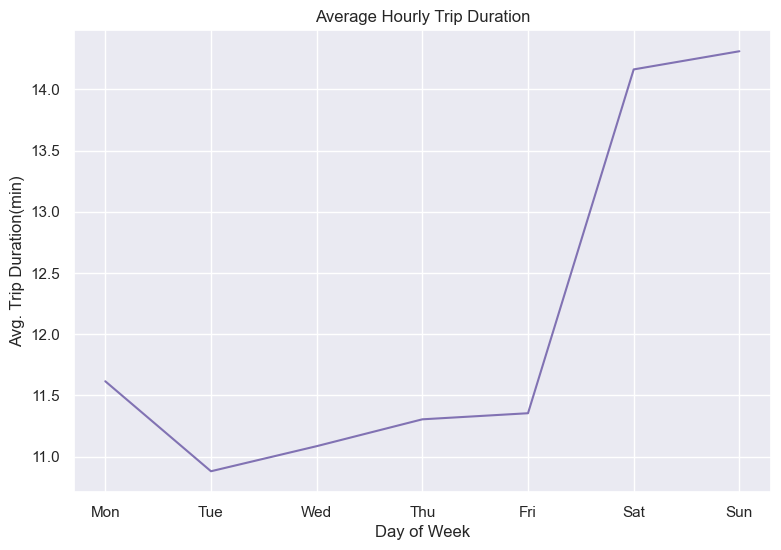

In [56]:
data = bike_data.groupby(['day'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'day', y='duration_min', color = '#8172b3')
plt.title('Average Hourly Trip Duration')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration(min)');

##### Observation
Trip durations are shorter on weekday than on weekends. From earlier investigation, we saw that trips on weekdays are mostly taken during typical work/school-home commute hours. On weekends, trips are longer showing usage could be for leisure purposes.

#### Question
14. What is the average trip duration on different times of the day?

#### Plot

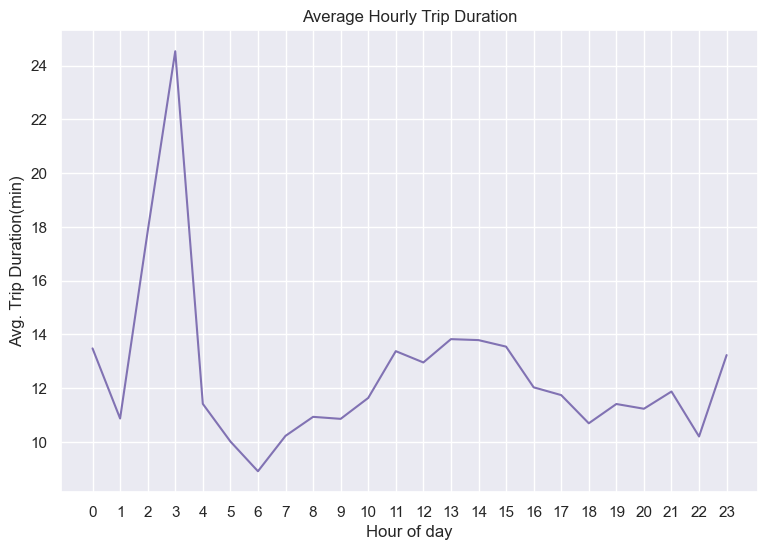

In [57]:
data = bike_data.groupby(['hour'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'hour', y='duration_min', color = '#8172b3')
plt.title('Average Hourly Trip Duration')
plt.xlabel('Hour of day')
plt.ylabel('Avg. Trip Duration(min)');

##### Observations

There seems to be unexpected behavior between 0200Hrs and 0359Hrs in the morning. The average trip duration is significantly higher than it is through out the day. Is this behavior common through out all days of the week?

#### Question
15. For the trips made between 2am and 3.59am, do both user types depict such behavior throughout the week?

#### Plot

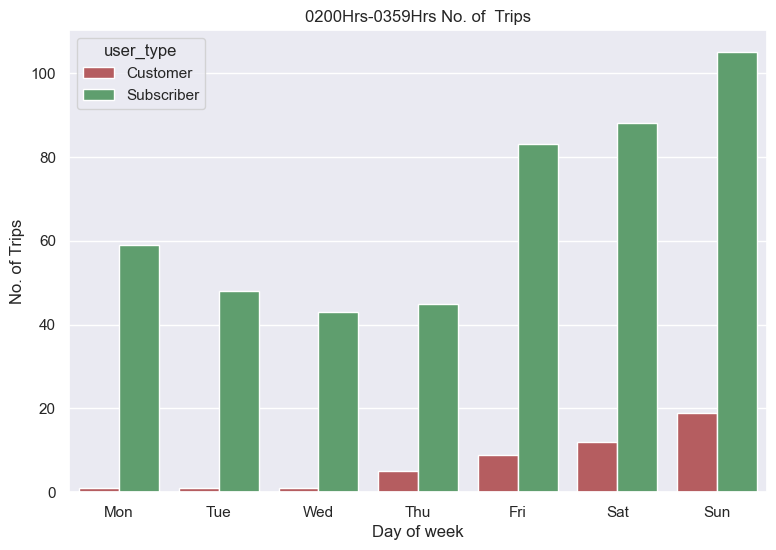

In [58]:
# See user behavior Between 2am -3.59 am
data_2am3am = bike_data[(bike_data['hour']=='2') | (bike_data['hour']=='3')]

data = data_2am3am.groupby(['day', 'user_type'], as_index=False)['bike_id'].count()
sns.barplot(data=data, x='day', y='bike_id', hue='user_type', palette=['r', 'g'])
plt.title('0200Hrs-0359Hrs No. of  Trips')
plt.xlabel('Day of week')
plt.ylabel('No. of Trips');

##### Observations

The rides that are taking place between 0200Hrs and 0359Hrs, are primarily from subscribers on Friday, Saturday and Sunday, but both user types have a significant increase in usage within the 2 hours from Friday to Sunday.  

### Conclusions from Bivariate Exploration

8.	From the age distribution we had earlier, most users are aged between 24 and 40 years. From this scatterplot, we see that longer trip durations are taken by people who are 60 and below. Members older than 60 years take shorter trips. However, there is no linear relationship between the 2 variables even with a log transform.
9.	Both user types are seen to mostly use the bike share service when people ideally commute to and from work.
10.	Both user types display the same behavior on weekdays and weekends. On weekdays, most trips are made around work-home commute hours. On weekends, majority of the trips are taken between 1000Hrs and 1859Hrs. Most trips are taken by subscribers of the service in comparison to casual customers.
11.	On average:
-	Majority of customers and subscribers fall around the same age group.
-	While the majority age based on gender is around the same value, the older bike riders appear to be males.
-	Majority of users that used the bike share for their entire trip appear to be younger than those that did not use bike share.
-	Majority of users on weekends (especially Sunday) are younger compared to weekdays.
12.	On average:
-	Casual risers have longer trips than customers
-	Male riders typically have shorter trips than female riders evident by a lower mean in male trips as well as a shorter inter quartile range.
-	Bike sharing trips run for a shorter duration than non-bike-share rides.
-	Weekend trips are typically longer that weekday trips.
13.	There seems to be unexpected behaviour between 0200Hrs and 0359Hrs in the morning. The average trip duration is significantly higher than it is throughout the day.
14.	The rides that are taking place between 0200Hrs and 0359Hrs, are primarily from subscribers on Friday, Saturday and Sunday, but both user types have a significant increase in usage within the 2 hours from Friday to Sunday.

<a id='multivariate'></a>
## Multivariate Exploration

Here, I'll explore the relationship between multiple variables at a time. 

#### Question
16. Does the average trip duration vary with user type throughout the day?

#### Plot

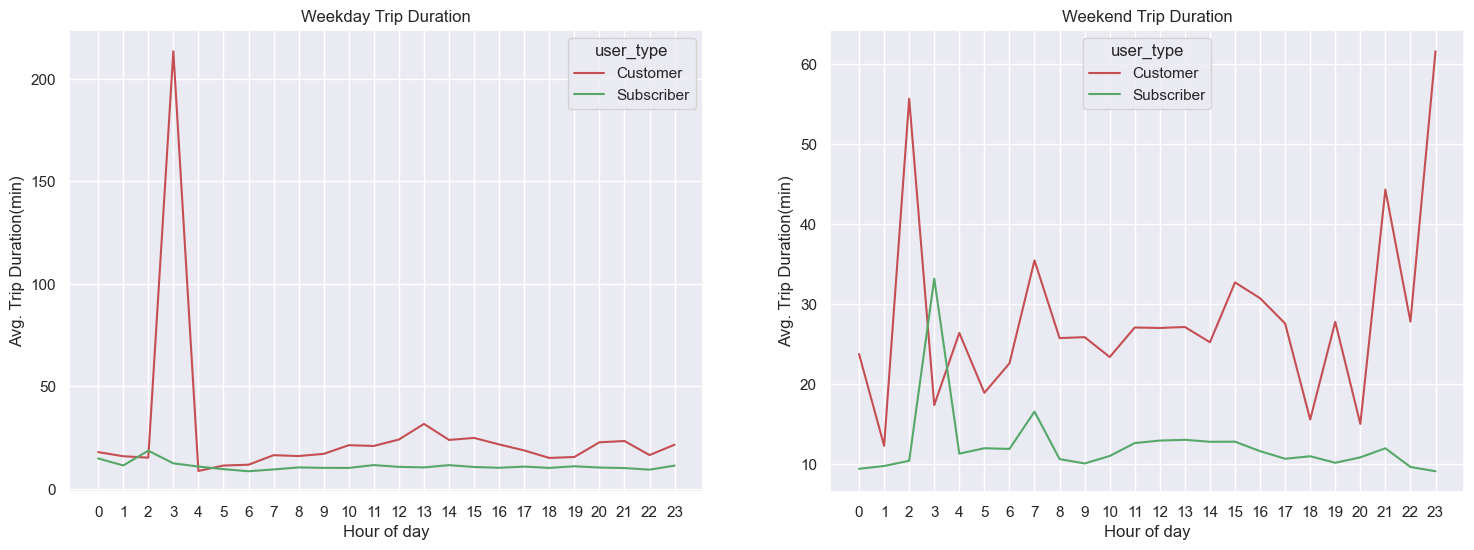

In [59]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
data = data_weekday.groupby(['hour', 'user_type'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'hour', y='duration_min', hue = 'user_type', palette=['r', 'g'])
plt.title('Weekday Trip Duration')
plt.xlabel('Hour of day')
plt.ylabel('Avg. Trip Duration(min)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
data = data_weekend.groupby(['hour', 'user_type'], as_index=False)['duration_min'].mean()
sns.lineplot(data = data, x = 'hour', y='duration_min', hue = 'user_type', palette=['r', 'g'])
plt.title('Weekend Trip Duration')
plt.xlabel('Hour of day')
plt.ylabel('Avg. Trip Duration(min)');

##### Observations

Earlier, we saw that subscribers take more trips than casual customers. From this view, however, it is evident that casual customers take longer trips on average compared to subscribers, especially on weekends.

#### Question
17. How does the average trip duration vary with gender across the week?

#### Plot

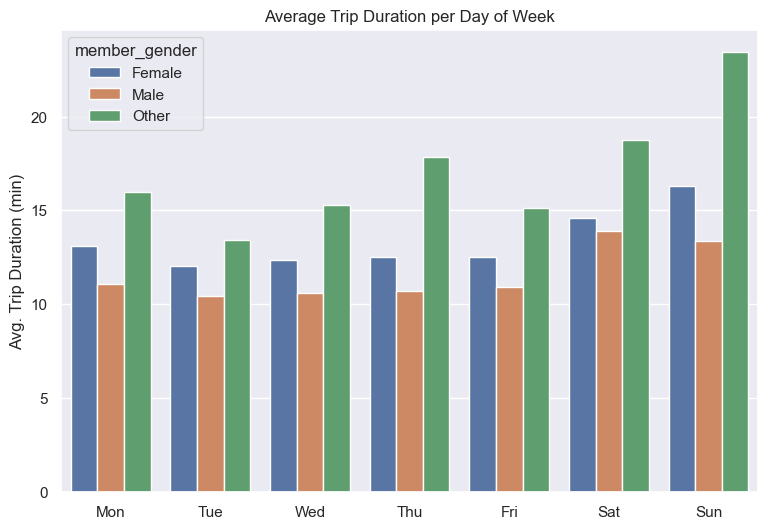

In [60]:
data = bike_data.groupby(['day', 'member_gender'], as_index=False)['duration_min'].mean()
sns.barplot(data=data, x='day', y='duration_min', hue='member_gender')
plt.title('Average Trip Duration per Day of Week')
plt.xlabel('')
plt.ylabel('Avg. Trip Duration (min)');

##### Observations

Member gender categorized as 'Other' is seen to go on longer rides on average. Females take longer trips than males and less than 'Other' 

#### Question
18. How different a behavior do both user types have hourly throughout the week?

#### Plot

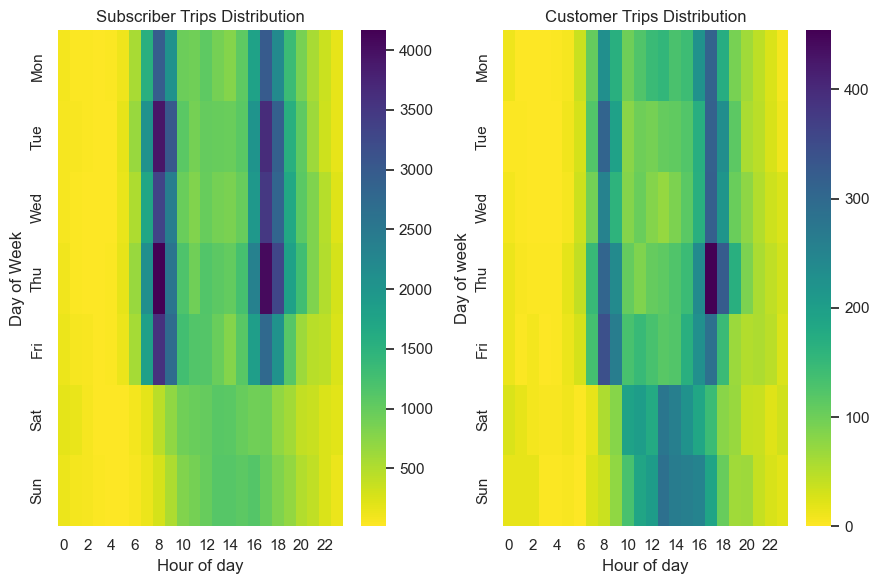

In [61]:
# PLOT ON LEFT
plt.subplot(1, 2, 1)
sub = bike_data[bike_data.user_type == 'Subscriber']
data_sub = sub.groupby(['day', 'hour'], as_index=False).size()
data_sub = data_sub.pivot(index='day', columns='hour', values='size')  # reshape data to heatmap format
sns.heatmap(data=data_sub, cmap='viridis_r')
plt.title('Subscriber Trips Distribution')
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
cust = bike_data[bike_data.user_type == 'Customer']
data_cust = cust.groupby(['day', 'hour'], as_index=False).size()
data_cust = data_cust.pivot(index='day', columns='hour', values='size') # reshape data to heatmap format
sns.heatmap(data=data_cust, cmap='viridis_r')
plt.title('Customer Trips Distribution')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.tight_layout()



##### Observations
Subscribers primarily use the biking service on weekdays between 0700Hrs to 0959Hrs in the morning and between 1600 Hrs and 1859Hrs.  On weekends, heavier usage is seen between 1000Hrs to 1759Hrs. Customers on the other hand, are seen to have heavy usage in the same hours as subscribers on weekdays, but tend to use the service more in between the commute hours to and from work. On weekends, they have are seen to use the service a lot between 1000Hrs and 1659Hrs. From user behavior, demand is highest on Thursday at around 1700Hrs.

In [62]:
# write wrangled data to csv to use in part II
bike_data.to_csv('bike_data.csv', index = False)

Refrences

1. [Seaborn Lineplot](https://stackoverflow.com/questions/59061856/creating-line-plot-where-y-axis-is-sum-of-rows-of-specific-value)